## Gradient Descent Implementation

In this Python notebook we will go through an example of implementing **Gradient Descent** in simple and multiple linear regression, for this we will be using housing dataset.

## Gradient descent

Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model. Parameters refer to coefficients in Linear Regression and weights in neural networks.

In [2]:
#Importing the dataset
import pandas as pd
housing = pd.read_csv('Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# Converting Yes to 1 and No to 0
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0})
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no': 0})
housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})

housing.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,NaN,NaN,NaN,NaN,NaN,2,NaN,furnished
1,12250000,8960,4,4,4,NaN,NaN,NaN,NaN,NaN,3,NaN,furnished
2,12250000,9960,3,2,2,NaN,NaN,NaN,NaN,NaN,2,NaN,semi-furnished
3,12215000,7500,4,2,2,NaN,NaN,NaN,NaN,NaN,3,NaN,furnished
4,11410000,7420,4,1,2,NaN,NaN,NaN,NaN,NaN,2,NaN,furnished
5,10850000,7500,3,3,1,NaN,NaN,NaN,NaN,NaN,2,NaN,semi-furnished
6,10150000,8580,4,3,4,NaN,NaN,NaN,NaN,NaN,2,NaN,semi-furnished
7,10150000,16200,5,3,2,NaN,NaN,NaN,NaN,NaN,0,NaN,unfurnished
8,9870000,8100,4,1,2,NaN,NaN,NaN,NaN,NaN,2,NaN,furnished
9,9800000,5750,3,2,4,NaN,NaN,NaN,NaN,NaN,1,NaN,unfurnished


In [5]:
#Converting furnishingstatus column to binary column using get_dummies
status = pd.get_dummies(housing['furnishingstatus'],drop_first=True)
housing = pd.concat([housing,status],axis=1)
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [6]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,NaN,NaN,NaN,NaN,NaN,2,NaN,0,0
1,12250000,8960,4,4,4,NaN,NaN,NaN,NaN,NaN,3,NaN,0,0
2,12250000,9960,3,2,2,NaN,NaN,NaN,NaN,NaN,2,NaN,1,0
3,12215000,7500,4,2,2,NaN,NaN,NaN,NaN,NaN,3,NaN,0,0
4,11410000,7420,4,1,2,NaN,NaN,NaN,NaN,NaN,2,NaN,0,0


In [7]:
# Normalisisng the data
housing = (housing - housing.mean())/housing.std()
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4.562174,1.045766,1.402131,1.420507,1.376952,NaN,NaN,NaN,NaN,NaN,1.516299,NaN,-0.844113,-0.69579
1,4.000809,1.755397,1.402131,5.400847,2.529700,NaN,NaN,NaN,NaN,NaN,2.676950,NaN,-0.844113,-0.69579
2,4.000809,2.216196,0.047235,1.420507,0.224204,NaN,NaN,NaN,NaN,NaN,1.516299,NaN,1.182502,-0.69579
3,3.982096,1.082630,1.402131,1.420507,0.224204,NaN,NaN,NaN,NaN,NaN,2.676950,NaN,-0.844113,-0.69579
4,3.551716,1.045766,1.402131,-0.569663,0.224204,NaN,NaN,NaN,NaN,NaN,1.516299,NaN,-0.844113,-0.69579


In [8]:
# Simple linear regression
# Assign feature variable X
X = housing['area']

# Assign response variable to y
y = housing['price']

In [9]:
# Conventional way to import seaborn
import seaborn as sns

# To visualise in the notebook
%matplotlib inline

C:\Users\ritesharyan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


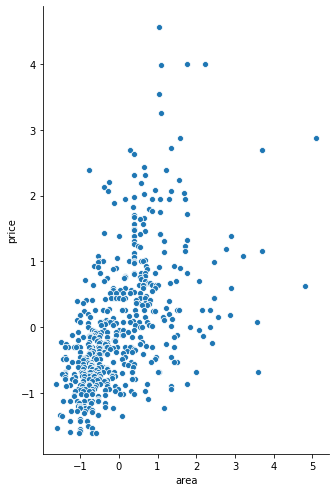

In [10]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(housing, x_vars='area', y_vars='price',size=7, aspect=0.7, kind='scatter')

**For linear regression we use a cost function known as the mean squared error or MSE.**

Now we will apply partial derivative with respect to m and c and will equate it to zero to find the least value of m and c for which our cost function get the lowest value as possible.

<img src="gd1.png"/>

Now to apply gradient descent from scratch we need our X and y variables as numpy arrays, Let's convert them.

In [12]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [13]:
# Implement gradient descent function
# Takes in X, y, current m and c (both initialised to 0), num_iterations, learning rate
# returns gradient at current m and c for each pair of m and c

def gradient(X, y, m_current=0, c_current=0, iters=1000, learning_rate=0.01):
    N = float(len(y))
    gd_df = pd.DataFrame( columns = ['m_current', 'c_current','cost'])
    for i in range(iters):
        y_current = (m_current * X) + c_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        m_gradient = -(2/N) * sum(X * (y - y_current))
        c_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        c_current = c_current - (learning_rate * c_gradient)
        gd_df.loc[i] = [m_current,c_current,cost]
    return(gd_df)


In [14]:
# print gradients at multiple (m, c) pairs
# notice that gradient decreased gradually towards 0
# we have used 1000 iterations, can use more if needed
gradients = gradient(X,y)
gradients

,m_current,c_current,cost
0,0.010700,3.731979e-18,0.998165
1,0.021187,1.981697e-17,0.986830
2,0.031464,2.998621e-17,0.975943
3,0.041536,2.656387e-17,0.965486
4,0.051407,2.433120e-17,0.955442
5,0.061081,2.840541e-17,0.945796
6,0.070562,3.605678e-17,0.936530
7,0.079854,3.760499e-17,0.927631
8,0.088960,4.073398e-17,0.919084
9,0.097884,5.728343e-17,0.910875


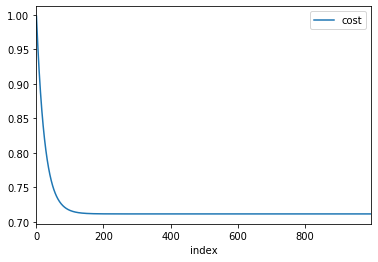

In [15]:
# plotting cost against num_iterations
gradients.reset_index().plot.line(x='index', y=['cost'])